# Machine Learning Assignment 2
Vasiliki Strouthopoulou 7115152200014

Panagiotis Xiropotamos 7115152200038

Marina Thalassini Filippidou 7115152200022

# Exercise 2C

In [ ]:
# Display the version
print(tf.__version__)


import numpy as np
import pandas as pd

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Input, BatchNormalization, MaxPooling2D, Dropout


import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

2.11.0


## Load the CIFAR-10 Dataset

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


We observe that we have 50K train images and 10K test images with dimensions of 32 x 32 x 3 pixels.

we check how an image is represented

In [ ]:
pd.DataFrame(x_train[0][:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,59,43,50,68,98,119,139,145,149,149,...,136,139,152,163,168,159,158,158,152,148
1,16,0,18,51,88,120,128,127,126,116,...,131,124,121,131,132,133,133,123,119,122
2,25,16,49,83,110,129,130,121,113,112,...,139,127,126,127,130,142,130,118,120,109
3,33,38,87,106,115,117,114,105,107,121,...,136,131,124,130,132,135,130,125,121,94
4,50,59,102,127,124,121,120,114,107,125,...,131,141,135,127,121,119,103,87,75,67
5,71,84,110,129,136,131,129,119,108,122,...,88,118,140,136,120,107,88,67,35,32
6,97,111,123,130,136,132,122,121,127,138,...,136,122,139,151,129,108,95,96,89,66
7,115,119,130,140,133,127,138,137,131,133,...,123,112,135,151,137,114,105,101,126,102
8,137,128,132,128,119,123,128,130,121,137,...,74,76,107,135,135,129,127,119,125,134
9,154,154,156,140,123,125,126,127,133,132,...,86,75,101,136,136,134,133,132,128,133


We observe that the image has 3 channels (RGB) and the pixels have values from 0-255.

Display some images

In [ ]:
y_train.shape
#y_train[i][0]

(50000, 1)

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

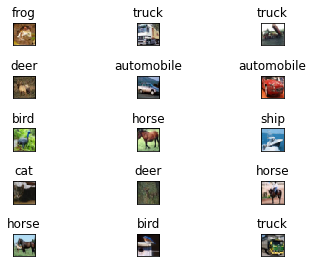

In [ ]:
# Create a plot figure
fig = plt.figure()

# Display the first 15 training images, along with their labels
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])

# Show the figure
plt.show()

# Data Preprocessing


In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


In [ ]:
x_train[0].shape

(32, 32, 3)


# Build and compile the model

In [ ]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
input = Input(shape=(32,32,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
output = Dense(K, activation='softmax')(x)

model = Model(input, output)

# model description
model.summary()


number of classes: 10
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_33 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 

In [ ]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


# Train the model

In [ ]:
# Fit
history= model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1563/1563 [==============================] - 572s 365ms/step - loss: 1.1998 - accuracy: 0.5739 - val_loss: 1.0626 - val_accuracy: 0.6287
Epoch 2/10
1563/1563 [==============================] - 564s 361ms/step - loss: 0.8427 - accuracy: 0.7074 - val_loss: 0.8286 - val_accuracy: 0.7190
Epoch 3/10
1563/1563 [==============================] - 556s 355ms/step - loss: 0.6922 - accuracy: 0.7593 - val_loss: 0.7055 - val_accuracy: 0.7618
Epoch 4/10
1563/1563 [==============================] - 553s 354ms/step - loss: 0.5819 - accuracy: 0.7988 - val_loss: 0.6531 - val_accuracy: 0.7822
Epoch 5/10
1563/1563 [==============================] - 556s 356ms/step - loss: 0.4972 - accuracy: 0.8298 - val_loss: 0.6873 - val_accuracy: 0.7791
Epoch 6/10
1563/1563 [==============================] - 556s 356ms/step - loss: 0.4298 - accuracy: 0.8520 - val_loss: 0.6033 - val_accuracy: 0.8034
Epoch 7/10
1563/1563 [==============================] - 605s 387ms/step - loss: 0.3650 - accuracy: 0.8740 - val_

# Evaluate model


313/313 - 24s - loss: 0.8292 - accuracy: 0.7854 - 24s/epoch - 76ms/step
Test loss: 0.8291875123977661
Test accuracy: 0.7853999733924866


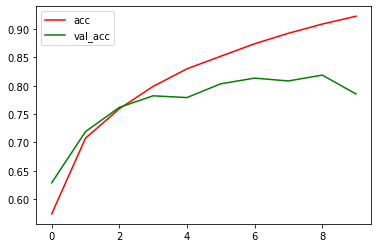

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:
def predict(x,predictor):
  activations=predictor.predict(x.reshape(1,32,32,3))
  prediction=np.argmax(activations)

  plt.bar(range(10),activations[0])
  plt.show()
  plt.imshow(x.reshape(32,32,3),cmap='Greys')
  plt.show

1/1 [==============================] - 0s 38ms/step


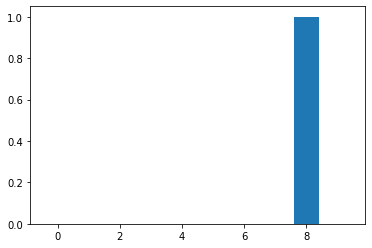

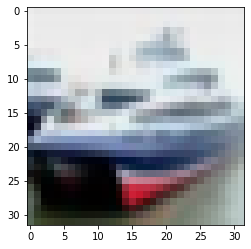

In [ ]:
#make a prediction
predict(x_test[1],model)

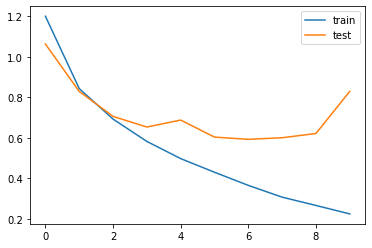

In [ ]:

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Predict the class names (labels) in test data
y_pred_probas = model.predict(x_test)
y_pred = np.argmax(y_pred_probas, axis=-1)
y_pred = tf.keras.utils.to_categorical(y_pred, num_classes=100, dtype="int32")

# Print evaluation report
#print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 27s 85ms/step


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Now let's inspect some of the predictions of the test images and compare them to the ground truth.

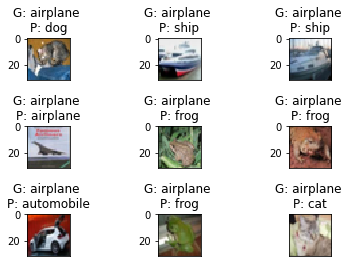

In [ ]:
# Create a figure with the ground truth labels of the images (G) and the predicted labels from the model (P)
offset = 0
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_test[i+offset], cmap='gray', interpolation='none')
    plt.title(f"G: {class_names[np.argmax(y_test[i+offset])]} \nP: {class_names[np.argmax(y_pred[i+offset])]}")
    plt.xticks([])

plt.yticks([])
plt.show()

we also inspect where our model made mistakes.

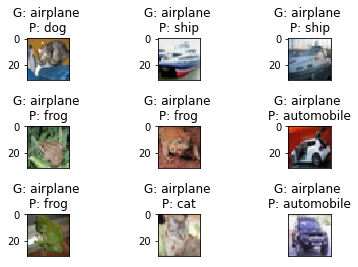

In [ ]:
# Find the ids that the model made a mistake
mistake_ids = [i for i in range(len(y_test)) if np.argmax(y_test[i])!=np.argmax(y_pred[i])]

# Create a figure for the first 9 mistakes
fig = plt.figure()
for m_i, m_idx in enumerate(mistake_ids[:9]):
    plt.subplot(3,3,m_i+1)
    plt.tight_layout()
    plt.imshow(x_test[m_idx], cmap='gray', interpolation='none')
    plt.title(f"G: {class_names[np.argmax(y_test[m_idx])]} \nP: {class_names[np.argmax(y_pred[m_idx])]}")
    plt.xticks([])

plt.yticks([])
plt.show()

In [ ]:
# Predict the class names (labels) in test data
y_pred_probas = model.predict(x_test)
y_pred = np.argmax(y_pred_probas, axis=-1)


# Print evaluation report
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 30s 95ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.90      0.82      1000
  automobile       0.86      0.93      0.89      1000
        bird       0.78      0.68      0.72      1000
         cat       0.58      0.62      0.60      1000
        deer       0.89      0.63      0.74      1000
         dog       0.60      0.82      0.69      1000
        frog       0.91      0.74      0.81      1000
       horse       0.83      0.86      0.84      1000
        ship       0.93      0.81      0.87      1000
       truck       0.89      0.86      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



We observe that our best predicted object is ship

# Save and load our model from drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
PATH = F"/content/gdrive/My Drive/{model}/{model}"
model.save('my_model')
loaded= keras.models.load_model("my_model")

#  Construct an adversarial example




In [ ]:
import tensorflow as tf
model.trainable=False

input=keras.Input(shape=(1,))
hidden=layers.Dense(256, activation="relu")(input)
hidden=layers.Dense(32*32*3,activation="sigmoid")(hidden)
output=layers.Reshape((32,32,3))(hidden)

adversarial_model=keras.Model(input,output)

adversarial_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[tf.keras.metrics.RootMeanSquaredError()])

composite=keras.Model(input,model(output))
composite.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

adversarial_model.summary()
composite.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_38 (Dense)            (None, 256)               512       
                                                                 
 dense_39 (Dense)            (None, 3072)              789504    
                                                                 
 reshape_13 (Reshape)        (None, 32, 32, 3)         0         
                                                                 
Total params: 790,016
Trainable params: 790,016
Non-trainable params: 0
_________________________________________________________________
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(Non

We choose to create an adversarial example for an instance an image with a ship. We select x_test[1] for which our model predicted a ship with 100% certainty

In [ ]:
from tqdm import tqdm

for _ in tqdm(range(100)):


  adversarial_model.train_on_batch([np.array([1])],np.array([x_test[1]]))
  composite.train_on_batch([np.array([1])],np.array([[0,0,0,0,0,0,0,0,0,1]]))


100%|██████████| 100/100 [00:07<00:00, 13.56it/s]


1/1 [==============================] - 0s 42ms/step


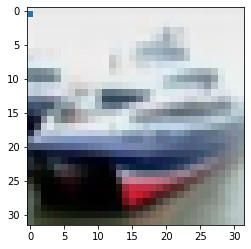

1/1 [==============================] - 0s 49ms/step


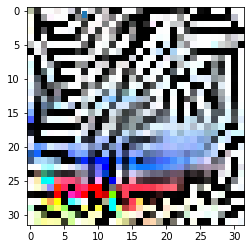

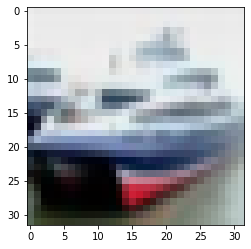

In [ ]:
advImage=adversarial_model.predict([np.array([1])]).reshape(1,32,32,3)
plt.imshow(x_test[1])
predict(advImage,model)
predict(x_test[1],model)